# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [323]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.












Now it should be clear for you how the logistic regression works.

In [324]:
data = pd.read_csv('../data/am_pm.csv')
data

,date,am,pm,target,pred
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


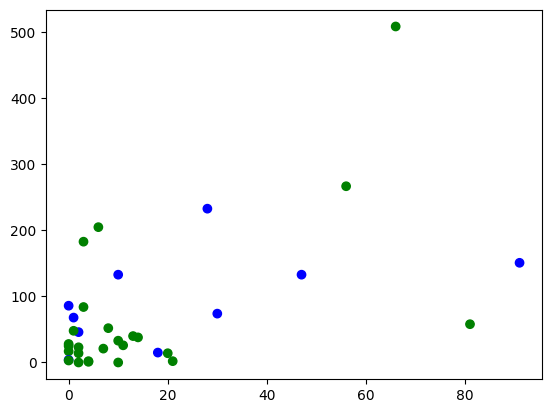

In [325]:

colors = data['target'].map({'working_day': 'green', 'weekend': 'blue'})
plt.scatter(data['am'], data['pm'], c=colors)
plt.show()


In [326]:
X = data[['am','pm']].values
y = data['target'].values
X

array([[ 21,   2],
       [  1,  68],
       [ 18,  15],
       [  2,  23],
       [  0,  25],
       [  0,  28],
       [ 10,  33],
       [  2,  14],
       [ 30,  74],
       [ 28, 233],
       [  4,   2],
       [  4,   1],
       [  0,  17],
       [ 13,  40],
       [  8,  52],
       [ 91, 151],
       [ 47, 133],
       [ 11,  26],
       [ 81,  58],
       [  2,   0],
       [ 14,  38],
       [  3,  84],
       [  0,  86],
       [ 10, 133],
       [  3, 183],
       [ 56, 267],
       [  6, 205],
       [ 66, 509],
       [ 10,   0],
       [  0,   4],
       [  2,  46],
       [  0,   3],
       [ 20,  14],
       [  7,  21],
       [  1,  48]])

In [327]:
model = LogisticRegression(random_state=21,fit_intercept=False)
model.fit(X,y)

coef = model.coef_[0]
intercept = model.intercept_[0]
print('Weight =',coef)
print('Bias = ',intercept)
prediction = model.predict([[4,5]])
prediction[0]

Weight = [-0.00038653  0.00298066]
Bias =  0.0


'working_day'

 w1 * x + w2 * y + b = 0

In [328]:
x_vals = np.linspace(data['am'].min(),data['am'].max(),100)
y_vals = (-coef[0]* x_vals - intercept)/coef[1]


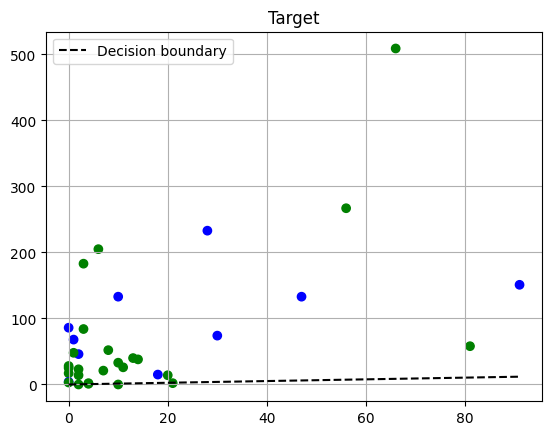

In [329]:

colors = data['target'].map({'working_day': 'green', 'weekend': 'blue'})
plt.scatter(data['am'], data['pm'], c=colors)
plt.plot(x_vals,y_vals, color ='black',linestyle ='--', label = 'Decision boundary')
plt.title('Target')
plt.legend()
plt.grid()
plt.show()

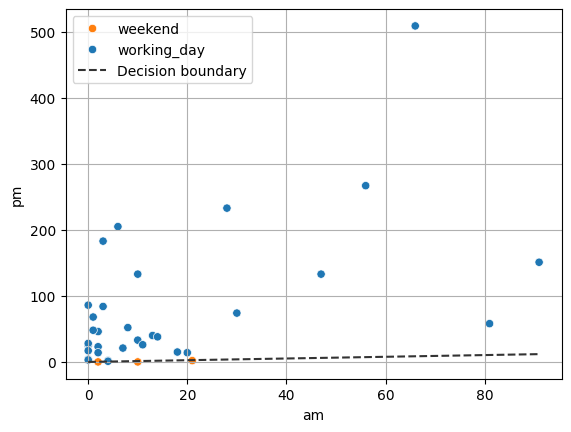

In [330]:
sns.scatterplot(data=data, x='am',y='pm',hue='pred',palette={'working_day':'#1f77b4','weekend':'#ff7f0e'})
sns.lineplot(x=x_vals,y=y_vals,color = '#333333', linestyle ='--', label = 'Decision boundary')
plt.grid()


## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [331]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [332]:
df_sc = data.copy()
df_sc

,date,am,pm,target,pred
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


In [333]:
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# X_train_scaled
df_sc[['am','pm']]= scaler.fit_transform(X)
df_sc


,date,am,pm,target,pred
0,2020-04-17,0.200690,-0.719904,working_day,weekend
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,working_day
9,2020-04-26,0.500501,1.548382,weekend,working_day


In [334]:
X_scaled = df_sc[['am','pm']].values
X_scaled

array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703],
       [-0.69874402, -0.46459877],
       [-0.27044208, -0.41550168],
       [-0.61308363, -0.60207063],
       [ 0.5861618 , -0.01290552],
       [ 0.50050141,  1.54838202],
       [-0.52742324, -0.71990365],
       [-0.52742324, -0.72972307],
       [-0.69874402, -0.57261237],
       [-0.1419515 , -0.34676575],
       [-0.35610247, -0.22893273],
       [ 3.19880362,  0.7431897 ],
       [ 1.31427509,  0.56644017],
       [-0.22761189, -0.48423761],
       [ 2.77050168, -0.17001622],
       [-0.61308363, -0.73954249],
       [-0.09912131, -0.36640459],
       [-0.57025344,  0.08528866],
       [-0.69874402,  0.1049275 ],
       [-0.27044208,  0.56644017],
       [-0.57025344,  1.05741109],
       [ 1.69974683,  1.88224224],
       [-0.44176286,  1.2734383 ],
       [ 2.12804877,  4.25854152],
       [-0.27044208,

In [335]:
model = LogisticRegression(random_state=21,fit_intercept=False)
model.fit(X_scaled,y)
y_pred = model.predict(X_scaled)
acccuracy = accuracy_score(y,y_pred)
acccuracy

0.7428571428571429

In [336]:
a = -model.coef_[0][0] / model.coef_[0][1]
b = -model.intercept_[0] / model.coef_[0][1]
xx = np.linspace(min(df_sc['am']), max(df_sc['am']))
yy = a  * xx + b


In [337]:

# min(df_sc['am'])
df_sc['am'].min()

np.float64(-0.6987440192155088)

Text(0.5, 1.0, 'Prediction')

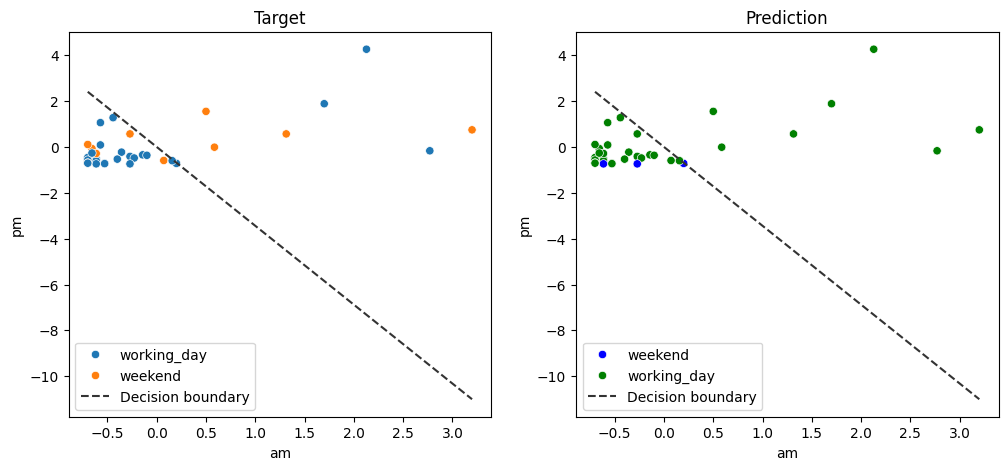

In [338]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=df_sc, x = 'am', y='pm',hue='target',palette={'working_day':'#1f77b4','weekend':'#ff7f0e'}, ax=axes[0])
sns.lineplot(x=xx,y=yy,color = '#333333', linestyle ='--', label = 'Decision boundary',ax=axes[0])
axes[0].set_title('Target')


sns.scatterplot(data=df_sc, x='am', y='pm',hue='pred',palette={'working_day':'green','weekend':'blue'}, ax=axes[1])
sns.lineplot(x=xx,y=yy,color = '#333333', linestyle ='--', label = 'Decision boundary',ax=axes[1])
axes[1].set_title('Prediction')


## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [339]:
# y = pd.Series(y).map({'working_day': 0, 'weekend': 1})

y

array(['working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day'], dtype=object)

In [340]:
SVM_model = SVC(probability=True,random_state=21)
SVM_model.fit(X_scaled,y)



SVC(probability=True, random_state=21)

In [341]:
y_pred_svc = SVM_model.predict(X_scaled)
y_pred_svc

array(['working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day'], dtype=object)

In [342]:
accuracy_score(y_pred_svc,y)


0.7428571428571429

In [343]:
y

array(['working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day'], dtype=object)

Kernel: linear, Accuracy: 0.714
Kernel: rbf, Accuracy: 0.743
Kernel: poly, Accuracy: 0.743
Kernel: sigmoid, Accuracy: 0.686


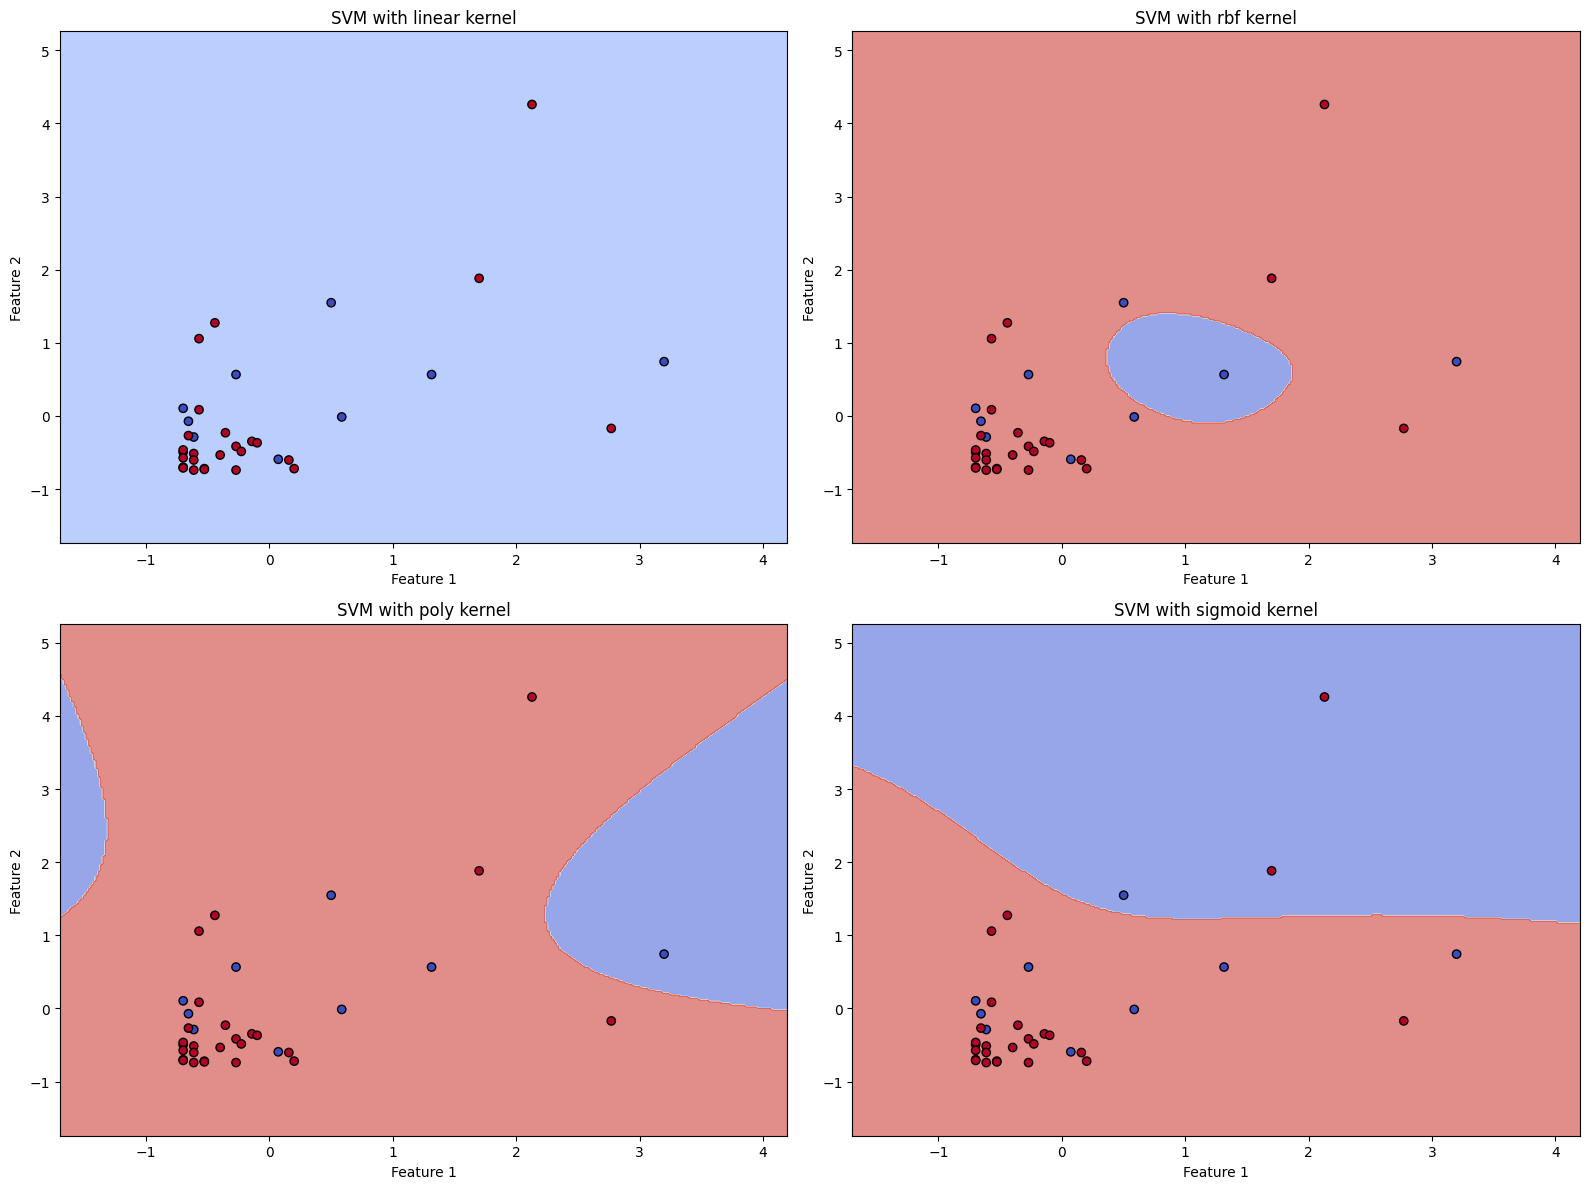

In [344]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'working_day'->0, 'weekend'->1 (for example)


x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx_m, yy_m = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

plt.figure(figsize=(16, 12))

for i, kernel in enumerate(kernels, 1):
    model = SVC(kernel=kernel, random_state=42, probability=True)
    model.fit(X_scaled, y_encoded)

    Z = model.predict(np.c_[xx_m.ravel(), yy_m.ravel()])
    Z = Z.reshape(xx_m.shape)

    y_pred = model.predict(X_scaled)
    acc = accuracy_score(y_encoded, y_pred)
    results[kernel] = acc
    print(f"Kernel: {kernel}, Accuracy: {acc:.3f}")

    plt.subplot(2, 2, i)
    plt.contourf(xx_m, yy_m, Z, alpha=0.6, cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f'SVM with {kernel} kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Prediction')

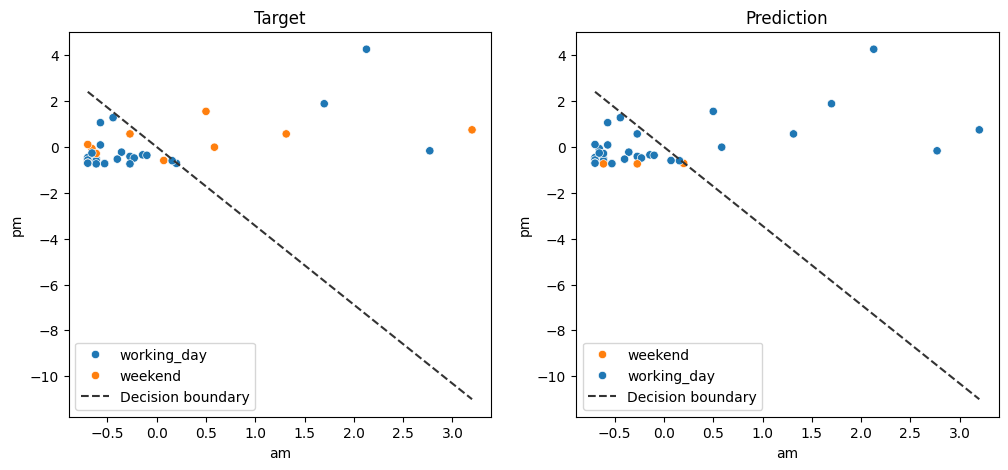

In [345]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=df_sc, x = 'am', y='pm',hue='target',palette={'working_day':'#1f77b4','weekend':'#ff7f0e'}, ax=axes[0])
sns.lineplot(x=xx,y=yy,color = '#333333', linestyle ='--', label = 'Decision boundary',ax=axes[0])
axes[0].set_title('Target')


sns.scatterplot(data=df_sc, x='am', y='pm',hue='pred',palette={'working_day':'#1f77b4','weekend':'#ff7f0e'}, ax=axes[1])
sns.lineplot(x=xx,y=yy,color = '#333333', linestyle ='--', label = 'Decision boundary',ax=axes[1])
axes[1].set_title('Prediction')


## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [346]:
df_dt = df_sc.drop(columns=['pred']).copy()
df_dt

,date,am,pm,target
0,2020-04-17,0.200690,-0.719904,working_day
1,2020-04-18,-0.655914,-0.071822,weekend
2,2020-04-19,0.072199,-0.592251,weekend
3,2020-04-20,-0.613084,-0.513696,working_day
4,2020-04-21,-0.698744,-0.494057,working_day
5,2020-04-22,-0.698744,-0.464599,working_day
6,2020-04-23,-0.270442,-0.415502,working_day
7,2020-04-24,-0.613084,-0.602071,working_day
8,2020-04-25,0.586162,-0.012906,weekend
9,2020-04-26,0.500501,1.548382,weekend


In [347]:
depth = 4
model_dec = DecisionTreeClassifier(max_depth=depth,random_state=4)
model_dec.fit(X_scaled,y)


DecisionTreeClassifier(max_depth=4, random_state=4)

In [348]:

y_pred = model_dec.predict(X_scaled)
df_dt['pred'] = y_pred
df_dt

,date,am,pm,target,pred
0,2020-04-17,0.200690,-0.719904,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,weekend
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,weekend
9,2020-04-26,0.500501,1.548382,weekend,weekend


In [349]:
acccuracy = accuracy_score(y_pred,y)
acccuracy

0.9428571428571428

In [350]:
depths = [6, 5, 4]
results = {}

for depth in depths:
    model_dec = DecisionTreeClassifier(max_depth=depth,random_state=4)
    model_dec.fit(X_scaled, y)
    y_pred = model_dec.predict(X_scaled)
    acc = accuracy_score(y_pred, y)
    results[depth] = acc
    print(f"Depth: {depth}, Accuracy: {acc}")

Depth: 6, Accuracy: 1.0
Depth: 5, Accuracy: 0.9714285714285714
Depth: 4, Accuracy: 0.9428571428571428


<Axes: xlabel='am', ylabel='pm'>

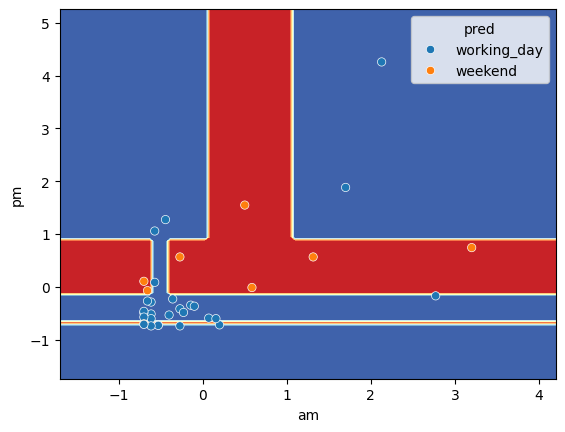

In [351]:
DecisionBoundaryDisplay.from_estimator(
        model_dec,
        X_scaled,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        xlabel='am',
        ylabel='pm',
    )
sns.scatterplot(data=df_dt, x='am', y='pm',hue='pred',palette={'working_day':'#1f77b4','weekend':'#ff7f0e'})

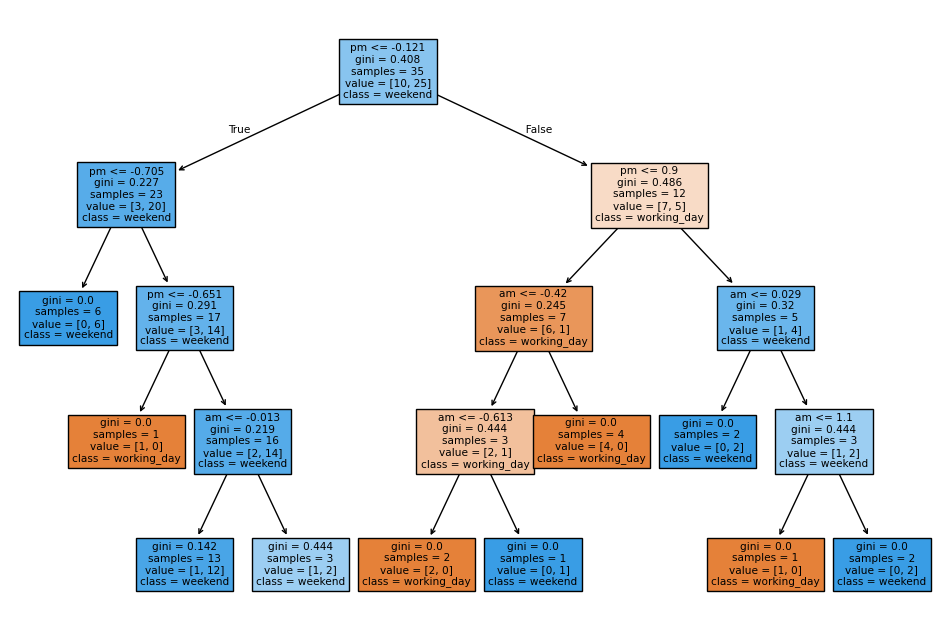

In [352]:
# depth = 6
plt.figure(figsize=(12, 8))
plot_tree(model_dec, feature_names=['am', 'pm'], class_names=['working_day','weekend'], filled=True)
plt.show()

How many leaves in the visualized tree label days as working days? 

The answer is 4